In [2]:
import pandas as pd
#pandas is for data structures and data analysis tools
import numpy as np
#numpy is for scientific computing
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import scipy.stats
from scipy.optimize import curve_fit
from IPython.display import Image
from IPython.display import display
#matplotlib is for plotting

The csv files we will study contain proton-proton collision events where four lepton candidates were observed in the CMS experiment in 2011 and 2012.
You can find the csv file here, along with more information on its contents : https://opendata.cern.ch/record/5200
Download it and add it to the juypter data directory.
We use Pandas to create a dataframe that allows us to easily analyse the events.
This is one type of process that can occur in proton-proton collisions which results in four leptons :


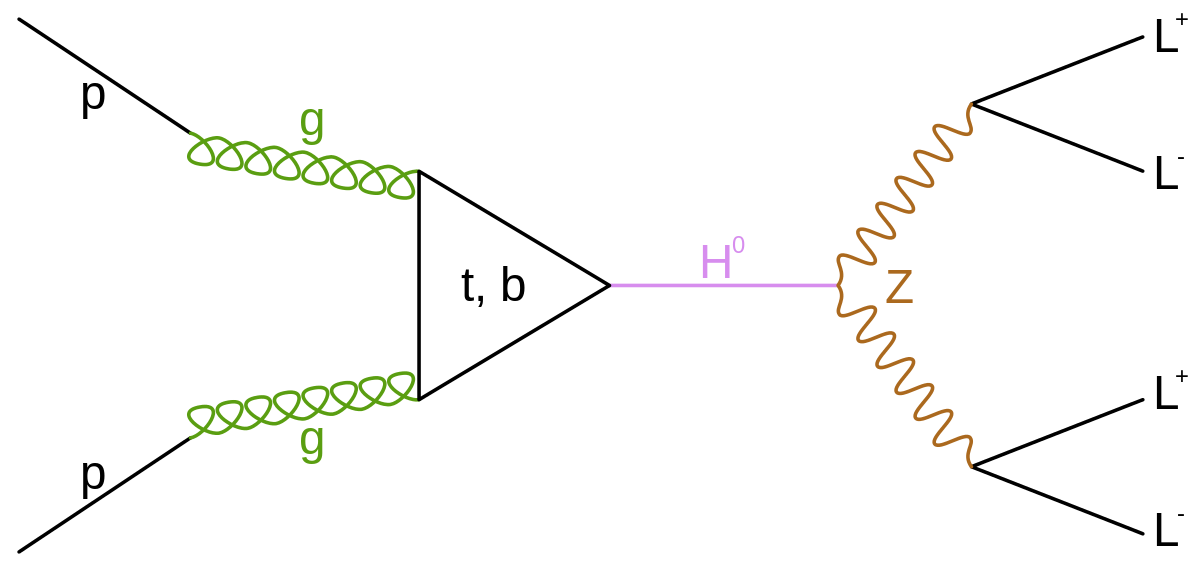

In [22]:
fourLep = [pd.read_csv('../data/4mu_2011.csv'),pd.read_csv('../data/4mu_2012.csv')]
fourLep += [pd.read_csv('../data/4e_2011.csv'),pd.read_csv('../data/4e_2012.csv')]
fourLep += [pd.read_csv('../data/2e2mu_2011.csv'),pd.read_csv('../data/2e2mu_2012.csv')]

data = pd.concat(fourLep)

x = Image(filename='../images/Higgs.png', width=450) 

print("The csv files we will study contain proton-proton collision events where four lepton candidates were observed in the CMS experiment in 2011 and 2012.") 
print("You can find the csv file here, along with more information on its contents : https://opendata.cern.ch/record/5200") 
print("Download it and add it to the juypter data directory.")
print("We use Pandas to create a dataframe that allows us to easily analyse the events.")
print("This is one type of process that can occur in proton-proton collisions which results in four leptons :") 
display(x) 


In this study we will be looking for evidence of a 125 GeV Higgs boson decaying to two Z bosons, which both subsequently decay to two leptons.
As such we will consider final states with 4 muons, 4 electrons, and 2 muons + 2 electrons.  
In the link above you can check what a Higgs to 4 lepton candidate event looks like in CMS. Remeber the Higgs boson has a very short lifetime, so we only ever detect its decay products in the CMS experiment. 

The amount of data corresponds to 2.3 $fb^{-1}$ in 2011 and 11.6 $fb^{-1}$ (integrated luminosities) in 2012. 
That is a fraction of the dataset used in the Run 1 CMS Higgs to 4 lepton paper : https://arxiv.org/abs/1312.5353

Lets start by checking what information we have for each event.  

These images of CMS should help you understand the most important kinematic information stored in the csv file. 


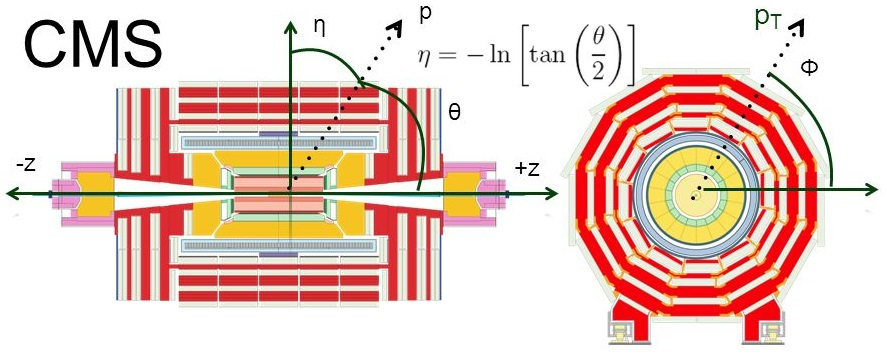

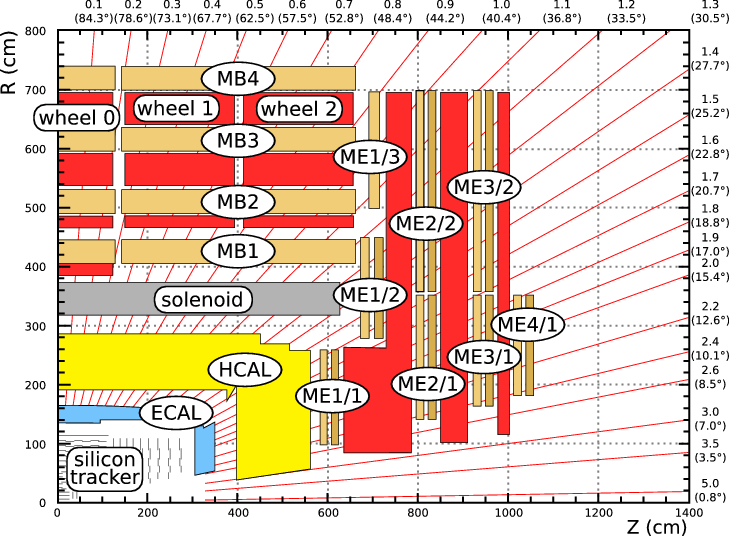

,Run,Event,PID1,E1,px1,py1,pz1,pt1,eta1,phi1,...,px4,py4,pz4,pt4,eta4,phi4,Q4,mZ1,mZ2,M
0,173657,34442568,13,35.9978,32.7631,-4.41922,-14.2436,33.0598,-0.418519,-0.134075,...,-1.20978,11.35650,1.29029,11.42070,0.112739,1.676920,1,62.5513,20.5205,91.4517
1,166512,337493970,13,52.9826,-49.9170,8.17082,15.7696,50.5813,0.306925,2.979340,...,2.32913,-13.06840,27.14400,13.27430,1.463510,-1.394420,1,92.1352,90.2049,235.8800
2,171091,69105221,13,165.9750,-12.6280,-30.22890,162.7100,32.7605,2.305880,-1.966510,...,-8.09683,3.05681,23.28190,8.65464,1.715610,2.780600,-1,58.3874,14.3541,79.3858
3,172952,559839432,13,110.2600,-69.1510,68.83630,-51.3524,97.5720,-0.504613,2.358470,...,3.02072,8.34856,-4.13324,8.87824,-0.450186,1.223630,1,91.1877,37.3758,232.9290
4,167282,44166176,-13,54.3881,-27.4999,-43.86520,-16.6628,51.7726,-0.316533,-2.130770,...,4.64276,-2.38618,4.41465,5.22007,0.767963,-0.474752,-1,90.7513,14.7350,119.2900


In [23]:
y = Image(filename='../images/CMS-COORD.jpg', width =800)
y2 = Image(filename='../images/CMS.png', width =400)
print("These images of CMS should help you understand the most important kinematic information stored in the csv file. ")
display(y, y2)


data.head()

Lets take a look at the main kinemtaic variables : the Pt of the leptons, the invariant mass of the dilepton pairs ($m_{ll}$) and the invariant mass of the 4 lepton system ($m_{4l}$). You can either reconstruct these yourself from the basic lepton information or use the stored variables. 

Whats the diffrence between the Z1 and Z2 dilepton pairs?
Can you say anything about the selection (cuts on variables) that must have been applied to the events? Does it correspond to whats in the CMS paper?


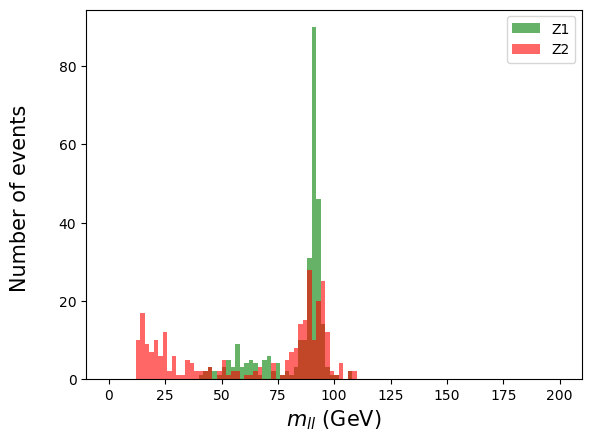

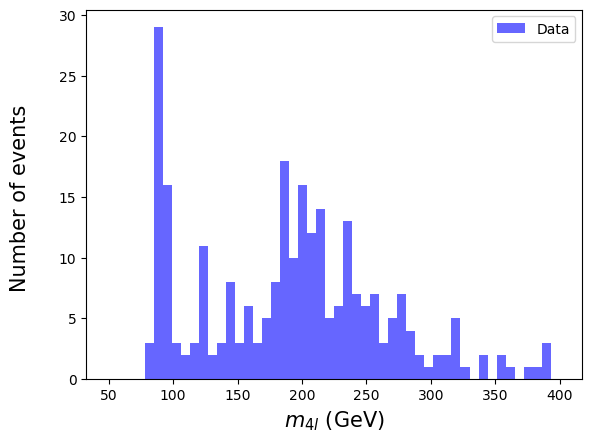

In [24]:

plt.hist(data.mZ1, 100, range = (0,200), alpha = 0.6 , color = 'green', label = 'Z1')
plt.hist(data.mZ2, 100, range = (0,200), alpha = 0.6 , color = 'red', label = 'Z2')

plt.xlabel('$m_{ll}$ (GeV)', fontsize = 15)
plt.ylabel('Number of events \n', fontsize = 15)
plt.legend()
#plt.yscale("log")
plt.show()

plt.hist(data.M, 50, range = (50,400), alpha = 0.6 , color = 'blue', label = 'Data')

plt.xlabel('$m_{4l}$ (GeV)', fontsize = 15)
plt.ylabel('Number of events \n', fontsize = 15)
plt.legend()
#plt.yscale("log")
plt.show()



Lets plot the 4 lepton mass focusing on the region we expect the Higgs boson and taking care to define the same binning used in the CMS paper. 
We also include the statistical uncertainties in the data.

You should compare this to Figure 9 in the CMS paper. 

What fraction of the Run 1 data (comparing intergrated luminosities) are we using here? Does it make sense with the amount of data we have? 
What processes can produse the 4 lepton events we are observing?


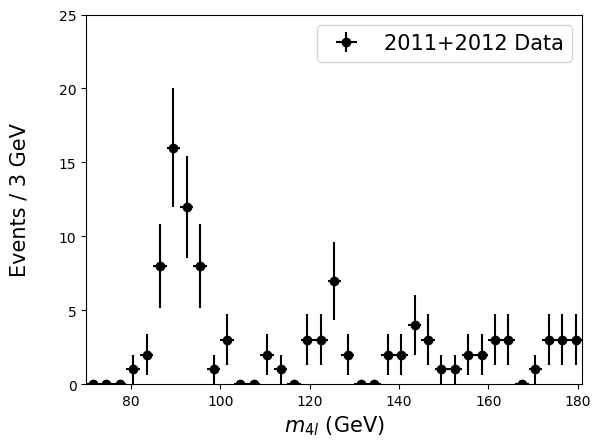

In [25]:
rmin = 70
rmax = 181
nbins = 37

M_hist = np.histogram(data.M, bins = nbins, range = (rmin,rmax))

hist, bins = M_hist
width = 1.0*(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2

xerrs = [width*0.5 for i in range(0, nbins)]
yerrs = np.sqrt(hist)

# Measured data
plt.errorbar(center, hist, xerr = xerrs, yerr = yerrs, linestyle = 'None', color = 'black',
                        marker = 'o', label = '2011+2012 Data')

plt.xlabel('$m_{4l}$ (GeV)', fontsize = 15)
plt.ylabel('Events / 3 GeV\n', fontsize = 15)
plt.ylim(0,25)
plt.xlim(rmin,rmax)
plt.legend(fontsize = 15)

plt.show()


In particle physics analyses, we make extensive use of Monte-Carlo based simulations to predict experimental outcomes.
We can simulate the relevant processes that occur in proton-proton collisions and the reponse of the CMS detector to predict the number of events we should expect in each $m_{4l}$ bin. 

First lets check the predictions for processes that produce 4 lepton final states other than Higgs boson decay i.e background processes. 

The dominant background to the Higgs signal in this channel is ZZ production via qq annihilation and gluon fusion. 
Then there is a smaller backgound from  Z + jets. There are even more backgorunds but we can ignore their very small contribution for this exercise.  
We have copied the $m_{4l}$ predictions in the mass range of interest for these processes. 


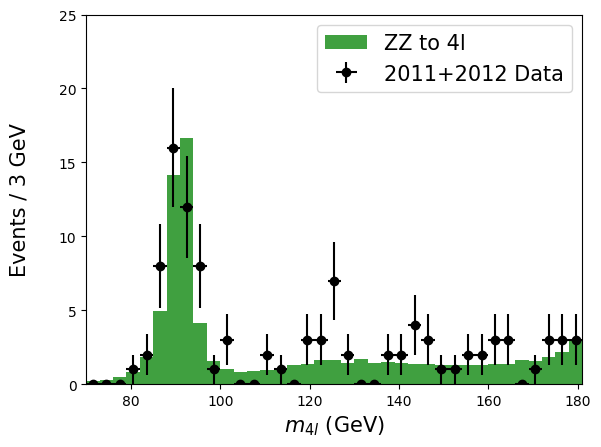

In [26]:
# background predictions
# Taken from : https://opendata-education.github.io/en_Physics/Exercises-with-open-data/Advanced/Hunting-the-Higgs-4leptons.html

zz = np.array([0.181215,0.257161,0.44846,0.830071,1.80272,4.57354,13.9677,14.0178,4.10974,1.58934,0.989974,0.839775,0.887188,0.967021,1.07882,1.27942,1.36681,1.4333,1.45141,1.41572,1.51464,1.45026,1.47328,1.42899,1.38757,1.33561,1.3075,1.29831,1.31402,1.30672,1.36442,1.39256,1.43472,1.58321,1.85313,2.19304,2.95083])
zjets = np.array([0,0,0,0,0,0.354797,0.177398,2.60481,0,0,0,0,0,0,0,0,0,0.177398,0.177398,0,0.177398,0,0,0,0,0,0,0,0,0,0,0,0.177398,0,0,0,0])
bkg = zz + zjets

plt.bar(center, bkg, align = 'center', width = width, color = 'g', linewidth = 0, edgecolor = 'green', alpha = 0.75, label = 'ZZ to 4l')

plt.errorbar(center, hist, xerr = xerrs, yerr = yerrs, linestyle = 'None', color = 'black',
                        marker = 'o', label = '2011+2012 Data')

plt.xlabel('$m_{4l}$ (GeV)', fontsize = 15)
plt.ylabel('Events / 3 GeV\n', fontsize = 15)
plt.ylim(0,25)
plt.xlim(rmin,rmax)
plt.legend(fontsize = 15)

plt.show()


So it seems most of the data distribution is well descibed by our background prediction. 

There does seem to be a small excess of event around 125 GeV (where we expect the Higgs boson peak to be). 

We have copied the $m_{4l}$ prediction in the mass range of interest for a SM Higgs boson at 125 GeV. Does it match the data? 

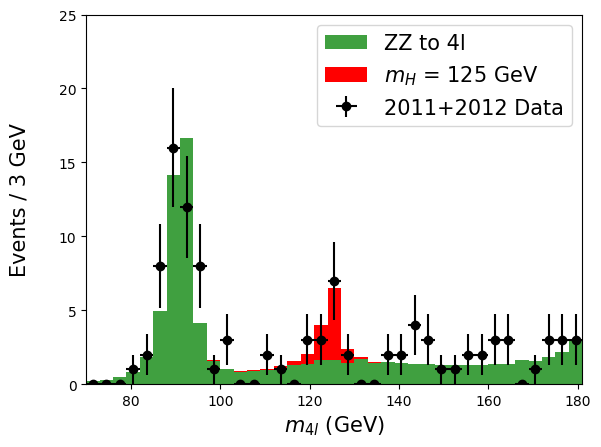

In [27]:
# SM Higgs boson @ 125 GeV prediction
# Taken from : https://opendata-education.github.io/en_Physics/Exercises-with-open-data/Advanced/Hunting-the-Higgs-4leptons.html

hzz = np.array([0.00340992,0.00450225,0.00808944,0.0080008,0.00801578,0.0108945,0.00794274,0.00950757,0.0130648,0.0163568,0.0233832,0.0334813,0.0427229,0.0738129,0.13282,0.256384,0.648352,2.38742,4.87193,0.944299,0.155005,0.0374193,0.0138906,0.00630364,0.00419265,0.00358719,0.00122527,0.000885718,0.000590479,0.000885718,0.000797085,8.86337e-05,0.000501845,8.86337e-05,0.000546162,4.43168e-05,8.86337e-05])
Signal_strenght = 1
hzz = hzz*Signal_strenght

plt.bar(center, bkg, align = 'center', width = width, color = 'g', linewidth = 0, edgecolor = 'green', alpha = 0.75, label = 'ZZ to 4l')
plt.bar(center, hzz, align = 'center', width = width, color = 'r', linewidth = 0, edgecolor = 'red',
                 bottom = bkg, label = '$m_{H}$ = 125 GeV')

plt.errorbar(center, hist, xerr = xerrs, yerr = yerrs, linestyle = 'None', color = 'black',
                        marker = 'o', label = '2011+2012 Data')

plt.xlabel('$m_{4l}$ (GeV)', fontsize = 15)
plt.ylabel('Events / 3 GeV\n', fontsize = 15)
plt.ylim(0,25)
plt.xlim(rmin,rmax)
plt.legend(fontsize = 15)

plt.show()



You can change the signal strength and check what effect if has on the agreement between the data and the prediction.

Of course you can see this by eye but you can also try to quanitfy it using the $\chi^{2}$. 

Can you conclude anything about the prefereed value of the signal strenght?


In [28]:
def getChiSq(residuals, var):
    chiSq = 0.0
    for bin in range(0, len(residuals)):
     if (var[bin] != 0):
      chiSq += (residuals[bin]/var[bin])**2
    return chiSq

total = bkg + hzz
residuals = hist - total
chi2 = getChiSq(residuals, yerrs)  
ndof = len(residuals) - 1

print(chi2)

14.357170042637929


You should try to automate this by looping over a number of signal strenght values, between 0 and 2 for example, and calculate the chi2 for each.

You should then plot the $\chi^{2}$ for each value of the signal strenght. 

Even better is to plot the $\Delta\chi^{2}$, we can define this as the $\chi^{2}$ subtracted by the minimum of all the $\chi^{2}$ (the best one). 

With this can you determine the preffered value of the signal strenght?
Extra points if you can use it to also determine an uncertainty?


Mu :  0.95  +  0.4  -  0.42


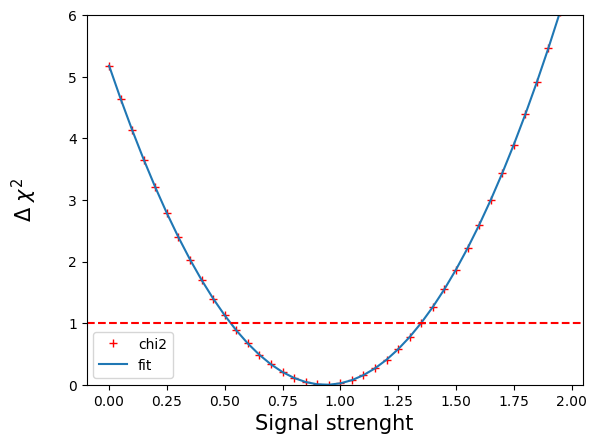

In [29]:

signal_strenghts = np.arange(0, 2.0, 0.05)
chi2_scan = np.array([])

for Mu in signal_strenghts:
 sig = hzz*Mu
 total = bkg + sig
 residuals = hist - total
 chi2 = getChiSq(residuals, yerrs)  
 chi2_scan = np.append(chi2_scan, chi2)

chi2_scan = chi2_scan - min(chi2_scan)

degree = 2 
coefficients = np.polyfit(signal_strenghts, chi2_scan, degree)
polynomial = np.poly1d(coefficients)
y_fit = polynomial(signal_strenghts)

zerocen = (polynomial - 0).roots
onesigma = (polynomial - 1.0).roots

cenval = round(zerocen[0],2)
upsigma = round(onesigma[0] - zerocen[0], 2)
dnsigma = round(zerocen[0] - onesigma[1], 2) 

print("Mu : ",cenval," + ",upsigma," - ", dnsigma) 

plt.plot(signal_strenghts, chi2_scan, 'r+', lw=5, alpha=1.0, label="chi2")
plt.plot(signal_strenghts, y_fit, label="fit")
plt.axhline(1, color='red', linestyle='--')
plt.gca().set_ylim([0, 6])
plt.xlabel('Signal strenght', fontsize = 15)
plt.ylabel('$\\Delta$ $\chi^2$\n', fontsize = 15)
plt.legend()
plt.show()